In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('drives.csv')
print(df['points_scored_offense'].mean())
print(df['points_scored_defense'].mean())
df['score_diff_start_off_adv'] = ((df['start_offense_score'] - df['start_defense_score'])>0).astype(int)
df['score_diff_start_def_adv'] = ((df['start_defense_score'] - df['start_offense_score'])>0).astype(int)
df['point_diff'] = df['points_scored_offense'] - df['points_scored_defense']
print(df['point_diff'].min())
df = df[df["drive_result"] != "Uncategorized"].copy()
df.info()


2.0520333780932285
0.14008248609246116
-74
<class 'pandas.core.frame.DataFrame'>
Index: 20724 entries, 0 to 20851
Data columns (total 54 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   offense                                               20724 non-null  object 
 1   offense_conference                                    20724 non-null  object 
 2   defense                                               20724 non-null  object 
 3   defense_conference                                    20724 non-null  object 
 4   game_id                                               20724 non-null  int64  
 5   id                                                    20724 non-null  int64  
 6   drive_number                                          20724 non-null  int64  
 7   scoring                                               20724 non-null  bool   
 8   start_period      

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

df = df[df['year'].isin([2023])]

if not df.empty:
	features = ['offense_idx', 'defense_idx', 'start_period', 'score_diff_start', 'is_home_offense', 'distance_to_goal', 'goal_to_go']

	X_train, X_test, y_train, y_test = train_test_split(df[features], df['points_scored_offense'], test_size=0.3, random_state=42)

	model = LinearRegression()
	model.fit(X_train, y_train)

	y_pred = model.predict(X_test)

	mae_offense_lr = mean_absolute_error(y_test, y_pred)
	mse_offense_lr = mean_squared_error(y_test, y_pred)
	r2_offense_lr = r2_score(y_test, y_pred)
	accuracy_offense_lr = max(0, r2_offense_lr) * 100

	print(f'Accuracy Score For Offense Model (lr): {accuracy_offense_lr:.2f}%')
	print(f'MAE Offense (lr): {mae_offense_lr}')
	print(f'MSE Offense (lr): {mse_offense_lr}')
	print(f'R² Offense (lr): {r2_offense_lr}')
	print(f'RMSE Offense: {np.sqrt(mse_offense_lr)}')
else:
	print("The filtered DataFrame is empty. Please check the filtering condition or the data.")

Accuracy Score For Offense Model (lr): 4.91%
MAE Offense (lr): 2.54457274179921
MSE Offense (lr): 8.617825521437487
R² Offense (lr): 0.0491021430335975
RMSE Offense: 2.9356133126550383


In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge

model_ridge = Ridge(random_state=42, alpha=1.0)
model_ridge.fit(X_train, y_train)

y_pred_ridge = model_ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
accuracy_ridge = max(0, r2_ridge) * 100

print(f'Accuracy Score For (Ridge): {accuracy_ridge:.2f}%')
print(f'MAE  (Ridge): {mae_ridge}')
print(f'MSE (Ridge): {mse_ridge}')
print(f'R² (Ridge): {r2_ridge}')
print(f'RMSE: {np.sqrt(mse_ridge)}')

Accuracy Score For (Ridge): 4.91%
MAE  (Ridge): 2.5446035044090674
MSE (Ridge): 8.617894060868508
R² (Ridge): 0.04909458033719427
RMSE: 2.935624986415756


In [7]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=500, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
accuracy_rf = max(0, r2) * 100  

print(f'Accuracy Score For RF : {accuracy_rf:.2f}%')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')
print(f'RMSE Defense: {np.sqrt(mse)}')

Accuracy Score For RF : 4.52%
MAE: 2.510606302902509
MSE: 8.653053304022697
R²: 0.0452150809339269
RMSE Defense: 2.941607265428663


Total drives after filtering teams with <25 drives: 306525


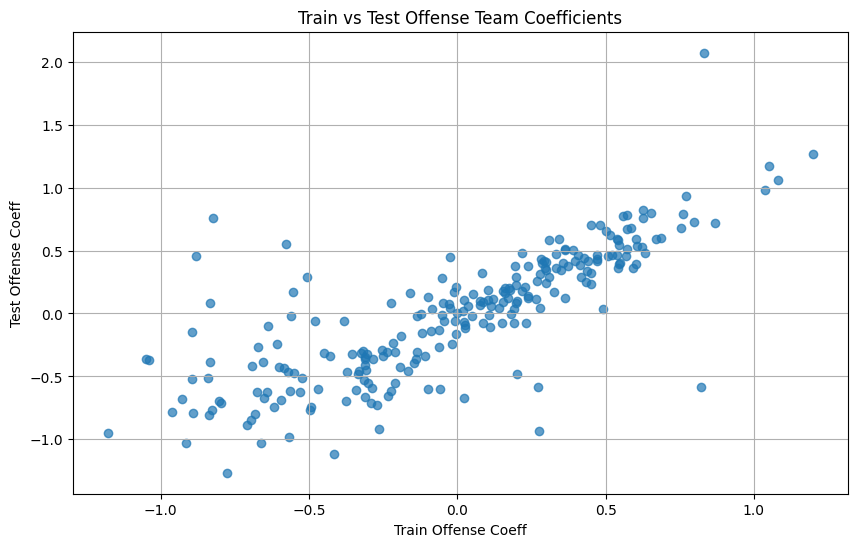

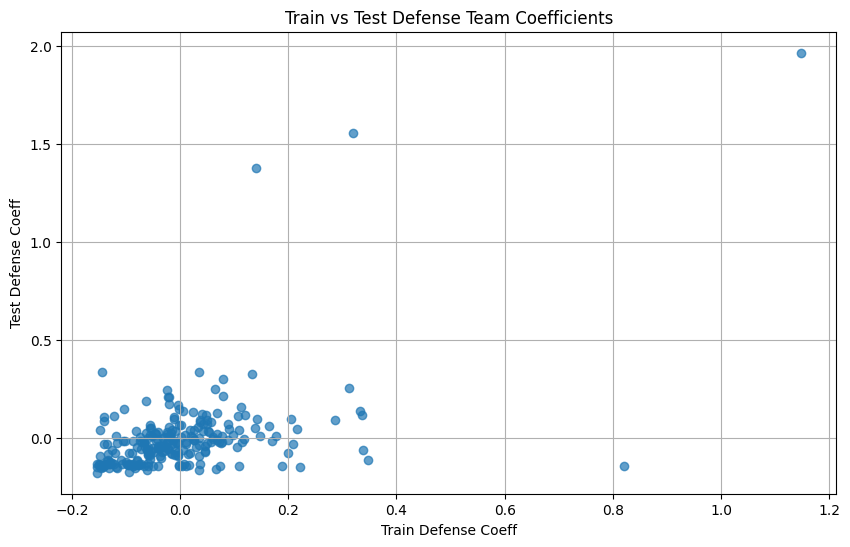

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

valid_off_teams = off_counts[off_counts >= threshold].index
valid_def_teams = def_counts[def_counts >= threshold].index

# Filter the entire dataset to include only drives from these teams
df = df[df['offense_idx'].isin(valid_off_teams) & df['defense_idx'].isin(valid_def_teams)].copy()
print("Total drives after filtering teams with <25 drives:", len(df_filtered))
features = ['start_period', 'score_diff_start', 'is_home_offense', 'distance_to_goal', 'goal_to_go']
offense_target = 'points_scored_offense'
defense_target = 'points_scored_defense'

offense_encoded = pd.get_dummies(df['offense_idx'].astype(str), prefix='offense')

X_offense = pd.concat([offense_encoded, df[features]], axis=1)
y_offense = df[offense_target]

X_train_off, X_test_off, y_train_off, y_test_off = train_test_split(X_offense, y_offense, test_size=0.3, random_state=42)

ridge_off = Ridge(alpha=1.0)
ridge_off.fit(X_train_off, y_train_off)

offense_coeff_train = pd.Series(ridge_off.coef_[:offense_encoded.shape[1]], index=offense_encoded.columns)

y_pred_off = ridge_off.predict(X_test_off)

ridge_off_test = Ridge(alpha=1.0)
ridge_off_test.fit(X_test_off, y_test_off)
offense_coeff_test = pd.Series(ridge_off_test.coef_[:offense_encoded.shape[1]], index=offense_encoded.columns)

team_name_map_off = df[['offense_idx', 'offense']].drop_duplicates().set_index('offense_idx')['offense'].astype(str).to_dict()
offense_coeff_df = pd.DataFrame({
    'team_id': [c.split('_')[-1] for c in offense_coeff_train.index],
    'team_name': [team_name_map_off.get(int(c.split('_')[-1]), 'Unknown') for c in offense_coeff_train.index],
    'train_offense_coeff': offense_coeff_train.values,
    'test_offense_coeff': offense_coeff_test.values
})

defense_encoded = pd.get_dummies(df['defense_idx'].astype(str), prefix='defense')

X_defense = pd.concat([defense_encoded, df[features]], axis=1)
y_defense = df[defense_target]

X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X_defense, y_defense, test_size=0.3, random_state=42)

ridge_def = Ridge(alpha=1.0)
ridge_def.fit(X_train_def, y_train_def)

defense_coeff_train = pd.Series(ridge_def.coef_[:defense_encoded.shape[1]], index=defense_encoded.columns)

y_pred_def = ridge_def.predict(X_test_def)

ridge_def_test = Ridge(alpha=1.0)
ridge_def_test.fit(X_test_def, y_test_def)
defense_coeff_test = pd.Series(ridge_def_test.coef_[:defense_encoded.shape[1]], index=defense_encoded.columns)

team_name_map_def = df[['defense_idx', 'defense']].drop_duplicates().set_index('defense_idx')['defense'].astype(str).to_dict()
defense_coeff_df = pd.DataFrame({
    'team_id': [c.split('_')[-1] for c in defense_coeff_train.index],
    'team_name': [team_name_map_def.get(int(c.split('_')[-1]), 'Unknown') for c in defense_coeff_train.index],
    'train_defense_coeff': defense_coeff_train.values,
    'test_defense_coeff': defense_coeff_test.values
})

team_ratings = pd.merge(offense_coeff_df, defense_coeff_df, on=['team_id', 'team_name'], how='outer')
team_ratings.to_csv("team_coefficients.csv", index=False)

plt.figure(figsize=(10, 6))
plt.scatter(team_ratings['train_offense_coeff'], team_ratings['test_offense_coeff'], alpha=0.7)
plt.title("Train vs Test Offense Team Coefficients")
plt.xlabel("Train Offense Coeff")
plt.ylabel("Test Offense Coeff")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(team_ratings['train_defense_coeff'], team_ratings['test_defense_coeff'], alpha=0.7)
plt.title("Train vs Test Defense Team Coefficients")
plt.xlabel("Train Defense Coeff")
plt.ylabel("Test Defense Coeff")
plt.grid(True)
plt.show()

Total drives after filtering teams with <25 drives: 306525
Team coefficients saved to team_coefficients.csv
  team_id          team_name  train_offense_coeff  test_offense_coeff  \
0       0  Abilene Christian             0.329396           -0.585981   
1       1          Air Force             0.622762            0.564932   
2      10           Arkansas             0.359378            0.286424   
3     100         Louisville             0.503478            0.388523   
4     101              Maine            -0.494651            0.137433   

   train_defense_coeff  test_defense_coeff  
0            -0.064717            0.059329  
1            -0.062007           -0.066871  
2             0.010345            0.052271  
3            -0.025022            0.023216  
4            -0.051410           -0.091106  
Correlation between train and test offense coefficients: 0.605
Correlation between train and test points per drive: 0.778
Total 4th down plays: 13664
Train 4th down plays: 8037
Test 4

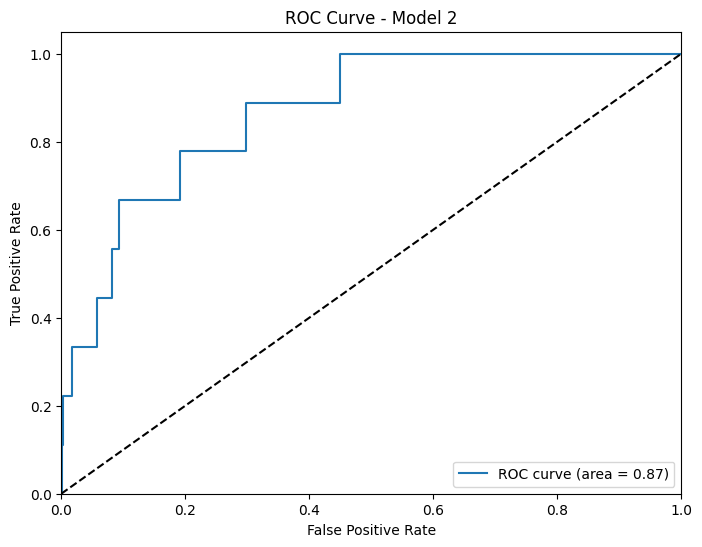

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load drive data
df = pd.read_csv("drives.csv")

# Filter out drives with missing points scored
df = df.dropna(subset=["points_scored_offense", "offense_idx", "defense_idx", "week"])

# One-hot encode teams
df['offense_idx'] = df['offense_idx'].astype(str)
df['defense_idx'] = df['defense_idx'].astype(str)
offense_dummies = pd.get_dummies(df['offense_idx'], prefix="off")
defense_dummies = pd.get_dummies(df['defense_idx'], prefix="def")

# Combine features
features = ['is_home_offense', 'distance_to_goal', 'goal_to_go']
X = pd.concat([df[features], offense_dummies, defense_dummies], axis=1)
y = df['points_scored_offense']

# Train/test split based on week
df['week'] = df['week'].astype(int)
train_mask = df['week'] < 9
test_mask = df['week'] > 8

X_train = X.loc[train_mask]
X_test = X.loc[test_mask]
y_train = y.loc[train_mask]
y_test = y.loc[test_mask]

# Train Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# Store team coefficients
coef_df = pd.DataFrame({
    'feature': X.columns,
    'train_coeff': ridge.coef_
})
coef_df = coef_df[coef_df['feature'].str.startswith("off_") | coef_df['feature'].str.startswith("def_")]
coef_df.to_csv("model0_team_coefficients.csv", index=False)

# Evaluation
print("Model 0 - Ridge Regression")
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv("drives.csv")

# ------------------------ MODEL 0 ------------------------
# Train/test split
df_train = df[df['week'] < 9].copy()
df_test = df[df['week'] > 8].copy()

# Remove teams with <25 drives in either set
train_off_counts = df_train['offense_idx'].value_counts()
test_off_counts = df_test['offense_idx'].value_counts()
train_def_counts = df_train['defense_idx'].value_counts()
test_def_counts = df_test['defense_idx'].value_counts()

valid_off = set(train_off_counts[train_off_counts >= 25].index) & set(test_off_counts[test_off_counts >= 25].index)
valid_def = set(train_def_counts[train_def_counts >= 25].index) & set(test_def_counts[test_def_counts >= 25].index)

df_train = df_train[df_train['offense_idx'].isin(valid_off) & df_train['defense_idx'].isin(valid_def)]
df_test = df_test[df_test['offense_idx'].isin(valid_off) & df_test['defense_idx'].isin(valid_def)]

# Features and encoding
features = ['start_period', 'score_diff_start', 'is_home_offense', 'start_yards_to_goal', 'goal_to_go']
target = 'points_scored_offense'

X_train_base = df_train[features]
X_test_base = df_test[features]

off_train = pd.get_dummies(df_train['offense_idx'].astype(str), prefix="off")
def_train = pd.get_dummies(df_train['defense_idx'].astype(str), prefix="def")
off_test = pd.get_dummies(df_test['offense_idx'].astype(str), prefix="off")
def_test = pd.get_dummies(df_test['defense_idx'].astype(str), prefix="def")

X_train = pd.concat([X_train_base, off_train, def_train], axis=1)
X_test = pd.concat([X_test_base, off_test, def_test], axis=1)

# Align columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
y_train = df_train[target]
y_test = df_test[target]

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Extract team coefficients
off_cols = [col for col in X_train.columns if col.startswith("off_")]
def_cols = [col for col in X_train.columns if col.startswith("def_")]

train_team_off = pd.Series(ridge.coef_[[X_train.columns.get_loc(c) for c in off_cols]], index=off_cols)
train_team_def = pd.Series(ridge.coef_[[X_train.columns.get_loc(c) for c in def_cols]], index=def_cols)

# Create lookup maps
team_rating_map_off = train_team_off.to_dict()
team_rating_map_def = train_team_def.to_dict()

# ------------------------ MODEL 1 ------------------------
# Define 4th down-like plays: TD and DOWNS (short drives with outcome defining success/failure)
model1_df = df[(df['drive_result'].isin(['TD', 'DOWNS']))].copy()
model1_df = model1_df.dropna(subset=['yards', 'distance_to_goal'])
model1_df['fourth_down_success'] = (model1_df['drive_result'] == 'TD').astype(int)

X1 = model1_df[['yards', 'distance_to_goal']]
y1 = model1_df['fourth_down_success']
X1_train = X1[model1_df['week'] < 9]
X1_test = X1[model1_df['week'] > 8]
y1_train = y1[model1_df['week'] < 9]
y1_test = y1[model1_df['week'] > 8]

log_reg1 = LogisticRegression(max_iter=1000)
log_reg1.fit(X1_train, y1_train)
y1_pred = log_reg1.predict(X1_test)

print("\nModel 1 - Basic 4th Down Conversion")
print(classification_report(y1_test, y1_pred))
print("Accuracy:", accuracy_score(y1_test, y1_pred))

# ------------------------ MODEL 2 ------------------------
model2_df = model1_df.copy()
model2_df['off_rating'] = model2_df['offense_idx'].apply(lambda x: team_rating_map_off.get(f'off_{x}', 0))
model2_df['def_rating'] = model2_df['defense_idx'].apply(lambda x: team_rating_map_def.get(f'def_{x}', 0))

X2 = model2_df[['yards', 'distance_to_goal', 'off_rating', 'def_rating']]
y2 = model2_df['fourth_down_success']
X2_train = X2[model2_df['week'] < 9]
X2_test = X2[model2_df['week'] > 8]
y2_train = y2[model2_df['week'] < 9]
y2_test = y2[model2_df['week'] > 8]

log_reg2 = LogisticRegression(max_iter=1000)
log_reg2.fit(X2_train, y2_train)
y2_pred = log_reg2.predict(X2_test)

print("\nModel 2 - With Team Ratings")
print(classification_report(y2_test, y2_pred))
print("Accuracy:", accuracy_score(y2_test, y2_pred))


Model 1 - Basic 4th Down Conversion
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      5623
           1       0.96      1.00      0.98     23881

    accuracy                           0.97     29504
   macro avg       0.97      0.92      0.94     29504
weighted avg       0.97      0.97      0.97     29504

Accuracy: 0.9660723969631236

Model 2 - With Team Ratings
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      5623
           1       0.96      1.00      0.98     23881

    accuracy                           0.97     29504
   macro avg       0.97      0.92      0.94     29504
weighted avg       0.97      0.97      0.97     29504

Accuracy: 0.9664452277657267


In [ ]:
# Load Model 0 coefficients
coeffs = pd.read_csv("model0_team_coefficients.csv")
offense_ratings = coeffs[coeffs['feature'].str.startswith("off_")].set_index('feature')['train_coeff'].to_dict()
defense_ratings = coeffs[coeffs['feature'].str.startswith("def_")].set_index('feature')['train_coeff'].to_dict()

# Add team ratings
df_4th['offense_idx'] = df_4th['offense_idx'].astype(str)
df_4th['defense_idx'] = df_4th['defense_idx'].astype(str)
df_4th['off_rating'] = df_4th['offense_idx'].apply(lambda x: offense_ratings.get(f'off_{x}', 0))
df_4th['def_rating'] = df_4th['defense_idx'].apply(lambda x: defense_ratings.get(f'def_{x}', 0))

# Model 2 Features
X2 = df_4th[['yards', 'distance_to_goal', 'off_rating', 'def_rating']]
y2 = df_4th['fourth_down_success']

X2_train, X2_test = X2[train_mask_4], X2[test_mask_4]
y2_train, y2_test = y2[train_mask_4], y2[test_mask_4]

# Train Model 2
log_reg2 = LogisticRegression(max_iter=1000)
log_reg2.fit(X2_train, y2_train)
y2_pred = log_reg2.predict(X2_test)

# Evaluation
print("Model 2 - 4th Down Success (w/ Team Ratings)")
print(classification_report(y2_test, y2_pred))
print("Accuracy:", accuracy_score(y2_test, y2_pred))

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the drives dataset
df = pd.read_csv('drives.csv')

# Split into train (weeks < 9) and test (weeks > 8)
df_train = df[df['week'] < 8].copy()
df_test  = df[df['week'] >= 8].copy()

# Remove teams with <25 drives in either train or test
train_off_counts = df_train['offense'].value_counts()
test_off_counts  = df_test['offense'].value_counts()
train_def_counts = df_train['defense'].value_counts()
test_def_counts  = df_test['defense'].value_counts()

valid_off_teams = set(train_off_counts[train_off_counts >= 25].index) \
                  & set(test_off_counts[test_off_counts >= 25].index)
valid_def_teams = set(train_def_counts[train_def_counts >= 25].index) \
                  & set(test_def_counts[test_def_counts >= 25].index)

# Filter the train and test sets to only include valid teams
df_train = df_train[df_train['offense'].isin(valid_off_teams) & 
                    df_train['defense'].isin(valid_def_teams)]
df_test  = df_test[df_test['offense'].isin(valid_off_teams) & 
                   df_test['defense'].isin(valid_def_teams)]

print("Train set drives:", len(df_train), " | Test set drives:", len(df_test))
print("Teams remaining (offense):", len(valid_off_teams), 
      "| Teams remaining (defense):", len(valid_def_teams))

Train set drives: 9100  | Test set drives: 8946
Teams remaining (offense): 133 | Teams remaining (defense): 133


In [5]:
# Define base features and target
features = ['start_period', 'score_diff_start', 'is_home_offense', 
            'start_yards_to_goal', 'goal_to_go']
target = 'points_scored_offense'

# One-hot encode offense and defense teams, dropping one dummy for each as baseline
baseline_off_team = sorted(valid_off_teams)[0]   # pick first team as baseline offense
baseline_def_team = sorted(valid_def_teams)[0]   # pick first team as baseline defense

# Training design matrix
X_train_base = df_train[features]
X_train_off  = pd.get_dummies(df_train['offense'], prefix="off")
X_train_def  = pd.get_dummies(df_train['defense'], prefix="def")
# Drop baseline team columns
X_train_off.drop(columns=f"off_{baseline_off_team}", inplace=True)
X_train_def.drop(columns=f"def_{baseline_def_team}", inplace=True)
X_train = pd.concat([X_train_base, X_train_off, X_train_def], axis=1)
y_train = df_train[target]

# Testing design matrix (ensure same columns as train)
X_test_base = df_test[features]
X_test_off  = pd.get_dummies(df_test['offense'], prefix="off")
X_test_def  = pd.get_dummies(df_test['defense'], prefix="def")
X_test_off.drop(columns=f"off_{baseline_off_team}", inplace=True, errors='ignore')
X_test_def.drop(columns=f"def_{baseline_def_team}", inplace=True, errors='ignore')
X_test = pd.concat([X_test_base, X_test_off, X_test_def], axis=1)
# Align test columns to train columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
y_test = df_test[target]

# Fit linear regression on train and on test data
lr_train = LinearRegression().fit(X_train, y_train)
lr_test  = LinearRegression().fit(X_test, y_test)

KeyError: "['off_0'] not found in axis"

In [4]:
import numpy as np

# Get offense and defense coefficient dictionaries from each model
off_coefs_train = {}
off_coefs_test = {}
def_coefs_train = {}
def_coefs_test = {}

for col, coef in zip(X_train.columns, lr_train.coef_):
    if col.startswith("off_"):
        off_coefs_train[col] = coef
    elif col.startswith("def_"):
        def_coefs_train[col] = coef
# Add baseline teams with 0 coefficient
off_coefs_train[f"off_{baseline_off_team}"] = 0.0
def_coefs_train[f"def_{baseline_def_team}"] = 0.0

for col, coef in zip(X_test.columns, lr_test.coef_):
    if col.startswith("off_"):
        off_coefs_test[col] = coef
    elif col.startswith("def_"):
        def_coefs_test[col] = coef
off_coefs_test[f"off_{baseline_off_team}"] = 0.0
def_coefs_test[f"def_{baseline_def_team}"] = 0.0

# Convert coefficient dicts to pandas Series indexed by team name for alignment
off_train_series = pd.Series({col.split('off_')[1]: val for col, val in off_coefs_train.items()})
off_test_series  = pd.Series({col.split('off_')[1]: val for col, val in off_coefs_test.items()})
def_train_series = pd.Series({col.split('def_')[1]: val for col, val in def_coefs_train.items()})
def_test_series  = pd.Series({col.split('def_')[1]: val for col, val in def_coefs_test.items()})

# Calculate correlation between train and test coefficients
offense_coef_corr  = off_train_series.corr(off_test_series)
defense_coef_corr  = def_train_series.corr(def_test_series)

# Calculate offense points-per-drive for each team in train vs test splits and correlation
ppd_train = df_train.groupby('offense')['points_scored_offense'].mean()
ppd_test  = df_test.groupby('offense')['points_scored_offense'].mean()
points_per_drive_corr = ppd_train.corr(ppd_test)

print("Offense coeff correlation (train vs test):", round(offense_coef_corr, 3))
print("Defense coeff correlation (train vs test):", round(defense_coef_corr, 3))
print("Offense points-per-drive correlation:", round(points_per_drive_corr, 3))

NameError: name 'X_train' is not defined

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

# Filter to drives that ended in TD or DOWNS and create the target variable
df_4th = df[df['drive_result'].isin(['TD', 'DOWNS'])].copy()
df_4th['fourth_down_success'] = (df_4th['drive_result'] == 'TD').astype(int)

# Features for Model 1: yards_to_go (using 'yards' gained as proxy) and yards_to_goal
X = df_4th[['yards', 'distance_to_goal']].rename(columns={'yards': 'yards_to_go',
                                                         'distance_to_goal': 'yards_to_goal'})
y = df_4th['fourth_down_success']

# Train/test split by week
X_train = X[df_4th['week'] < 8]
X_test  = X[df_4th['week'] >= 8]
y_train = y[df_4th['week'] < 8]
y_test  = y[df_4th['week'] >= 8]

# Train logistic regression
logreg1 = LogisticRegression(max_iter=1000)
logreg1.fit(X_train, y_train)

# Predict on test set
y_pred = logreg1.predict(X_test)
y_prob = logreg1.predict_proba(X_test)[:, 1]  # probability of success

# Evaluate Model 1
accuracy1 = accuracy_score(y_test, y_pred)
rmse1 = mean_squared_error(y_test, y_prob, squared=False)
print(f"Model 1 Test Accuracy: {accuracy1:.3f}")
print(f"Model 1 Test RMSE: {rmse1:.3f}")

Model 1 Test Accuracy: 0.962
Model 1 Test RMSE: 0.173


In [3]:
# Add offensive and defensive team ratings (coefficients from Model 0 train) to the 4th-down dataset
off_coeff_map = off_train_series.to_dict()  # offense team -> coefficient
def_coeff_map = def_train_series.to_dict()  # defense team -> coefficient

df_4th['train_off_coef'] = df_4th['offense_idx'].apply(lambda idx: off_coeff_map.get(str(idx), 0))
df_4th['train_def_coef'] = df_4th['defense_idx'].apply(lambda idx: def_coeff_map.get(str(idx), 0))

# Features for Model 2 include yards_to_go, yards_to_goal, and the team coefficients
X2 = df_4th[['yards', 'distance_to_goal', 'train_off_coef', 'train_def_coef']].rename(
            columns={'yards': 'yards_to_go', 'distance_to_goal': 'yards_to_goal'})
y2 = df_4th['fourth_down_success']

# Train/test split by week
X2_train = X2[df_4th['week'] < 9]
X2_test  = X2[df_4th['week'] > 8]
y2_train = y2[df_4th['week'] < 9]
y2_test  = y2[df_4th['week'] > 8]

# Train logistic regression with additional features
logreg2 = LogisticRegression(max_iter=1000)
logreg2.fit(X2_train, y2_train)

# Predict on test set
y2_pred = logreg2.predict(X2_test)
y2_prob = logreg2.predict_proba(X2_test)[:, 1]

# Evaluate Model 2
accuracy2 = accuracy_score(y2_test, y2_pred)
rmse2 = mean_squared_error(y2_test, y2_prob, squared=False)
print(f"Model 2 Test Accuracy: {accuracy2:.3f}")
print(f"Model 2 Test RMSE: {rmse2:.3f}")

NameError: name 'off_train_series' is not defined